In [1]:
#Import of all libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from tqdm import tqdm
import tensorflow as tf
from keras.preprocessing import image
from sklearn.preprocessing import label_binarize
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D
#from keras.optimizers import adam_v2


In [2]:
labels_all = pd.read_csv('archive/labels.csv')
print(labels_all.shape)
labels_all.head()

(10222, 2)


,id,breed
0,000bec180eb18c7604dcecc8fe0dba07,boston_bull
1,001513dfcb2ffafc82cccf4d8bbaba97,dingo
2,001cdf01b096e06d78e9e5112d419397,pekinese
3,00214f311d5d2247d5dfe4fe24b2303d,bluetick
4,0021f9ceb3235effd7fcde7f7538ed62,golden_retriever


In [3]:
breeds_all = labels_all['breed']
breed_count = breeds_all.value_counts() # number of time you find all values
print(len(breed_count))
breed_count.head()

120


scottish_deerhound      126
maltese_dog             117
afghan_hound            116
entlebucher             115
bernese_mountain_dog    114
Name: breed, dtype: int64

In [5]:
class_names = ['scottish_deerhound','maltese_dog','bernese_mountain_dog']
labels = labels_all[(labels_all['breed']).isin(class_names)]
labels = labels.reset_index()
labels.head()

,index,id,breed
0,9,0042188c895a2f14ef64a918ed9c7b64,scottish_deerhound
1,12,00693b8bc2470375cc744a6391d397ec,maltese_dog
2,79,01e787576c003930f96c966f9c3e1d44,scottish_deerhound
3,90,022b34fd8734b39995a9f38a4f3e7b6b,maltese_dog
4,118,02d54f0dfb40038765e838459ae8c956,bernese_mountain_dog


In [6]:
#creating numpy matrix with zeros
X_data = np.zeros((len(labels), 224, 224, 3), dtype='float32') # 3 -> RGB
#one hot encoding
Y_data = label_binarize(labels['breed'], classes= class_names)

# Reading and converting image to numpy array and normalizeing dataset
for i in tqdm(range(len(labels))): #tqdm progress bar of your loop
    img = image.load_img('archive/train/%s.jpg' % labels['id'][i],target_size=(224, 224)) # '%s' % name or '%i' % value ...
    img = image.img_to_array(img)
    x = np.expand_dims(img.copy(),axis=0) # expand the dimension or size to (1, 224, 224, 3) instead of (224, 224, 3)
    X_data[i] = x / 255.0 # divide by 255 because we want value of RGB to be between 0 and 1

# Printing train image and one hot encode shape & size
print('\nTrain Images shapes: ', X_data.shape, ' size: {:,} '.format(X_data.size))
print('One-hot encoded output shape: ',Y_data.shape,'size: {:,}'.format(Y_data.size)) # in {} we put parameters



100%|██████████| 357/357 [00:01<00:00, 251.98it/s]


Train Images shapes:  (357, 224, 224, 3)  size: 53,738,496 
One-hot encoded output shape:  (357, 3) size: 1,071


In [15]:
# Building the model

model = Sequential()

model.add(Conv2D(filters= 64, kernel_size= (5, 5), activation= 'relu', input_shape = (224,224,3)))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Conv2D(filters= 32, kernel_size= (3,3), activation= 'relu', kernel_regularizer= 'l2'))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Conv2D(filters= 16, kernel_size=(7,7), activation= 'relu', kernel_regularizer= 'l2'))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Conv2D(filters= 8, kernel_size=(5,5), activation= 'relu', kernel_regularizer= 'l2'))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Flatten())
model.add(Dense(128, activation='relu', kernel_regularizer= 'l2'))
model.add(Dense(64, activation= 'relu', kernel_regularizer= 'l2'))
model.add(Dense(len(class_names), activation= 'softmax'))
opt= tf.keras.optimizers.Adam(learning_rate=0.001)
model.compile(loss = 'categorical_crossentropy', optimizer= opt,metrics=['accuracy'])

model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_8 (Conv2D)            (None, 220, 220, 64)      4864      
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 110, 110, 64)      0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 108, 108, 32)      18464     
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 54, 54, 32)        0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 48, 48, 16)        25104     
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 24, 24, 16)        0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 20, 20, 8)        

In [16]:
# Splitting the data set into training and testing data sets
X_train_and_val, X_test, Y_train_and_val, Y_test = train_test_split(X_data, Y_data, test_size= 0.1)
# Splitting the training data set into a training and validation data sets
X_train, X_val, Y_train, Y_val = train_test_split(X_train_and_val, Y_train_and_val, test_size= 0.2) 

In [17]:
# Training the model
epochs = 10
batch_size = 128

history = model.fit(X_train,Y_train, batch_size= batch_size, epochs= epochs, validation_data= (X_val, Y_val))

Epoch 1/10
2/2 [==============================] - 29s 13s/step - loss: 4.8442 - accuracy: 0.3359 - val_loss: 4.6851 - val_accuracy: 0.3077
Epoch 2/10
2/2 [==============================] - 22s 11s/step - loss: 4.6473 - accuracy: 0.3750 - val_loss: 4.4851 - val_accuracy: 0.3077
Epoch 3/10
2/2 [==============================] - 22s 12s/step - loss: 4.4151 - accuracy: 0.4180 - val_loss: 4.2807 - val_accuracy: 0.4615
Epoch 4/10
2/2 [==============================] - 22s 12s/step - loss: 4.2313 - accuracy: 0.4688 - val_loss: 4.0960 - val_accuracy: 0.4000
Epoch 5/10
2/2 [==============================] - 22s 11s/step - loss: 4.0575 - accuracy: 0.3711 - val_loss: 3.9168 - val_accuracy: 0.4769
Epoch 6/10
2/2 [==============================] - 25s 14s/step - loss: 3.8746 - accuracy: 0.4766 - val_loss: 3.7406 - val_accuracy: 0.5846
Epoch 7/10
2/2 [==============================] - 29s 13s/step - loss: 3.6982 - accuracy: 0.5469 - val_loss: 3.5536 - val_accuracy: 0.6154
Epoch 8/10
2/2 [===========

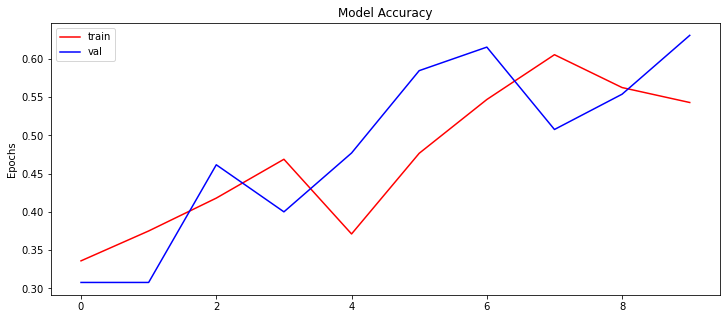

In [18]:
# Plot the training history

plt.figure(figsize=(12, 5))
plt.plot(history.history['accuracy'],color='r')
plt.plot(history.history['val_accuracy'],color='b')
plt.title('Model Accuracy')
plt.ylabel('Epochs')
plt.legend(['train', 'val'])

plt.show()

In [19]:
#Prediction accuracy 
Y_pred = model.predict(X_test)
score = model.evaluate(X_test, Y_test)

print('Accuracy over the test set: \n', round((score[1]*100), 2), '%')

2/2 [==============================] - 1s 97ms/step - loss: 3.0141 - accuracy: 0.6111
Accuracy over the test set: 
 61.11 %


Originally :  scottish_deerhound
Predicted :  scottish_deerhound


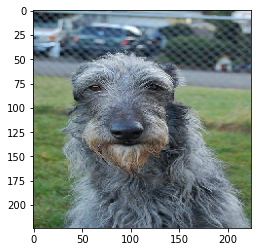

In [20]:
# Plotting image to compare
plt.imshow(X_test[1,:,:,:])
plt.show

#finding max value from prédiction list and comparing original to predicted
print("Originally : ", labels['breed'][np.argmax(Y_test[1])])
print("Predicted : ", labels['breed'][np.argmax(Y_pred[1])])

In [21]:
#Export your model 
model.save("dog_breed.h5")